# Load Data from CSV file

사용된 dataset : https://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet


import matplotlib
import matplotlib.font_manager as fm
import matplotlib as mpl
from matplotlib import rc

import platform
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
import matplotlib.pyplot as plt
print(plt.style.available)

# i picked 'seaborn-v0_8-whitegrid'
plt.style.use('seaborn-whitegrid')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
%pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [4]:
# '서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv' 파일의 인코딩 방식을 알아내기
with open('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


# Understanding the Data

In [5]:
# read the data (with the encoding)
original_df = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding=result['encoding'])
original_df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202410,1호선,동대문,634,22,12458,1990,10170,7253,16816,...,9969,771,2838,4,231,0,0,0,0,20241103
1,202410,1호선,동묘앞,223,4,3169,1026,3758,5319,9258,...,4882,106,1831,0,263,0,0,0,0,20241103
2,202410,1호선,서울역,573,9,8623,9367,14928,61884,42711,...,13969,2848,3802,1,207,0,0,0,0,20241103
3,202410,1호선,시청,84,1,2078,5753,4249,30299,8265,...,3775,506,979,1,41,0,0,0,0,20241103
4,202410,1호선,신설동,384,22,9813,2340,10345,10232,22756,...,9779,375,2781,0,1,0,1,0,0,20241103


In [6]:
# check the data types
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69931 entries, 0 to 69930
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           69931 non-null  int64 
 1   호선명           69931 non-null  object
 2   지하철역          69931 non-null  object
 3   04시-05시 승차인원  69931 non-null  int64 
 4   04시-05시 하차인원  69931 non-null  int64 
 5   05시-06시 승차인원  69931 non-null  int64 
 6   05시-06시 하차인원  69931 non-null  int64 
 7   06시-07시 승차인원  69931 non-null  int64 
 8   06시-07시 하차인원  69931 non-null  int64 
 9   07시-08시 승차인원  69931 non-null  int64 
 10  07시-08시 하차인원  69931 non-null  int64 
 11  08시-09시 승차인원  69931 non-null  int64 
 12  08시-09시 하차인원  69931 non-null  int64 
 13  09시-10시 승차인원  69931 non-null  int64 
 14  09시-10시 하차인원  69931 non-null  int64 
 15  10시-11시 승차인원  69931 non-null  int64 
 16  10시-11시 하차인원  69931 non-null  int64 
 17  11시-12시 승차인원  69931 non-null  int64 
 18  11시-12시 하차인원  69931 non-null  int64 
 19  12시-

In [7]:
# check the unique values of '호선명'
print(f"총 {original_df['호선명'].nunique()}개의 호선이 있습니다.")
print(original_df['호선명'].unique())

# check the unique values of '지하철역'
print(f"총 {original_df['지하철역'].nunique()}개의 지하철역이 있습니다.")
print(original_df['지하철역'].unique())

총 28개의 호선이 있습니다.
['1호선' '2호선' '3호선' '4호선' '5호선' '6호선' '7호선' '8호선' '9호선' '9호선2~3단계' '경강선'
 '경부선' '경원선' '경의선' '경인선' '경춘선' '공항철도 1호선' '과천선' '분당선' '서해선' '수인선' '신림선'
 '안산선' '우이신설선' '일산선' '장항선' '중앙선' '9호선2단계']
총 598개의 지하철역이 있습니다.
['동대문' '동묘앞' '서울역' '시청' '신설동' '제기동' '종각' '종로3가' '종로5가' '청량리(서울시립대입구)' '강남'
 '강변(동서울터미널)' '건대입구' '교대(법원.검찰청)' '구로디지털단지' '구의(광진구청)' '낙성대(강감찬)' '당산'
 '대림(구로구청)' '도림천' '동대문역사문화공원(DDP)' '뚝섬' '문래' '방배' '봉천' '사당' '삼성(무역센터)'
 '상왕십리' '서울대입구(관악구청)' '서초' '선릉' '성수' '신답' '신당' '신대방' '신도림' '신림' '신정네거리'
 '신촌' '아현' '양천구청' '역삼' '영등포구청' '왕십리(성동구청)' '용답' '용두(동대문구청)' '을지로3가'
 '을지로4가' '을지로입구' '이대' '잠실(송파구청)' '잠실나루' '잠실새내' '종합운동장' '충정로(경기대입구)' '한양대'
 '합정' '홍대입구' '가락시장' '경복궁(정부서울청사)' '경찰병원' '고속터미널' '구파발' '금호' '남부터미널(예술의전당)'
 '녹번' '대청' '대치' '도곡' '독립문' '동대입구' '매봉' '무악재' '불광' '수서' '신사' '안국' '압구정'
 '약수' '양재(서초구청)' '연신내' '오금' '옥수' '일원' '잠원' '지축' '충무로' '학여울' '홍제' '길음'
 '남태령' '노원' '당고개' '동작(현충원)' '명동' '미아(서울사이버대학)' '미아사거리' '삼각지' '상계'
 '성신여대입구(돈암)' '수유(강북구청)' '숙대입구(갈월)' '신용산' '쌍문' '이촌(국립중앙박물관)' '창

# Data Preprocessing

In [8]:
# drop '호선명', '작업일자' columns
original_df = original_df.drop(['호선명', '작업일자'], axis=1)
print(original_df.columns)

# '사용월' 202410 -> 10|
original_df['사용월'] = original_df['사용월'] % 100
print(original_df['사용월'].unique())

Index(['사용월', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원',
       '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원',
       '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원',
       '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원',
       '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원',
       '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원',
       '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원',
       '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원',
       '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원',
       '03시-04시 하차인원'],
      dtype='object')
[10  9  8  7  6  5  4  3  2  1 12 11]


In [9]:
original_df.head()

,사용월,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,10,동대문,634,22,12458,1990,10170,7253,16816,12049,...,5815,9969,771,2838,4,231,0,0,0,0
1,10,동묘앞,223,4,3169,1026,3758,5319,9258,10158,...,1240,4882,106,1831,0,263,0,0,0,0
2,10,서울역,573,9,8623,9367,14928,61884,42711,117041,...,29792,13969,2848,3802,1,207,0,0,0,0
3,10,시청,84,1,2078,5753,4249,30299,8265,74509,...,10346,3775,506,979,1,41,0,0,0,0
4,10,신설동,384,22,9813,2340,10345,10232,22756,26027,...,3887,9779,375,2781,0,1,0,1,0,0


# Make Function to aggregate data

* input : 
  * month='월'(필수),
  * station='역명'(필수), 
  * eta='예상도착시간'(필수)
* output : 
  * 해당 month, station, eta에 대한 평균 승하차 인원

In [22]:
def preprocess_eta(eta) :
    # 08시 -> 08시-09시
    # 24시 -> 00시-01시
    # 00시 -> 00시-01시
    eta = str(eta)
    if eta == '24시' :
        eta = '0시'
    eta = eta + '-' + str(int(eta.split('시')[0])+1) + '시'
    return eta

def get_aggregation_getonoff(original_df, input) :
    
    '''
    input :
        key : '사용월', '지하철역', '예상도착시간'
        
    output :
        key : '평균 승차인원', '평균 하차인원'
    '''    
    
    month = input['사용월']
    station = input['지하철역']
    eta = str(input['예상도착시간']) + '시'
    
    # filter the data
    df_filtered = original_df[(original_df['사용월'] == month) & (original_df['지하철역'] == station)]
    
    # get maximum getonoff value
    eta = preprocess_eta(eta)
    eta_geton = eta + ' 승차인원'
    eta_getoff = eta + ' 하차인원'
    
    avg_geton = df_filtered[eta_geton].mean()
    avg_getoff = df_filtered[eta_getoff].mean()
    
    # return 
    return {'평균 승차인원' : avg_geton, '평균 하차인원' : avg_getoff}

def plot_aggregation_getonoff(aggregation_getonoff=None, data=None) :
    month = data['사용월']
    station = data['지하철역']
    eta = data['예상도착시간']
    
    rc('font', family='AppleGothic') 			
    plt.rcParams['axes.unicode_minus'] = False 
        
    # plot using seaborn
     # Prepare data for plotting
    categories = aggregation_getonoff.keys()
    values = aggregation_getonoff.values()

    # Set up the figure and axes
    plt.figure(figsize=(5, 6))
    plt.bar(categories, values, color=['red', 'blue'], width=0.5)
    eta = preprocess_eta(eta)
    plt.title(f'{station}역 {month}월 {eta} 승하차인원', fontsize=15)
    plt.ylabel('인원 수(명)', fontsize=12, rotation=0)
    for i, v in enumerate(values):
        plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
        

    # Save the plot
    plt.tight_layout()
    plt.savefig(f'{station}_{month}월_{eta}_승하차인원.png')
    
    # Show plot
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    

# Training Prediction Model

* 입력 : '사용월', '지하철역', '예상도착시간'
  * ex) : 11, '홍대입구역', 19
* 출력 : '승차인원', '하차인원' -> 2개의 output
  * ex) : 100, 50

In [11]:
def transform_data(df):
    data = []
    for hour in range(4, 24):  # 04시-23시
        if hour == 23:  # 23시-24시는 특별 처리
            time_col = "23시-24시"
        else:
            next_hour = hour + 1
            time_col = f"{hour:02d}시-{next_hour:02d}시"
        
        승차_col = f"{time_col} 승차인원"
        하차_col = f"{time_col} 하차인원"
        
        # 시간대별로 데이터 구성
        temp_df = df[['사용월', '지하철역']].copy()
        temp_df['예상도착시간'] = hour
        temp_df['승차인원'] = df[승차_col]
        temp_df['하차인원'] = df[하차_col]
        
        data.append(temp_df)
    
    return pd.concat(data, axis=0).reset_index(drop=True)

In [12]:
# another df
transformed_df = transform_data(original_df)

In [13]:
# 범주형 변수 인코딩
station_encoder = LabelEncoder()
month_encoder = LabelEncoder()

transformed_df['지하철역'] = station_encoder.fit_transform(transformed_df['지하철역'])
transformed_df['사용월'] = month_encoder.fit_transform(transformed_df['사용월'])

# 입력 변수(X)와 출력 변수(y) 분리
X = transformed_df[['사용월', '지하철역', '예상도착시간']]
y = transformed_df[['승차인원', '하차인원']]

# 데이터 정규화 (스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LSTM 모델에 맞는 데이터 형태로 변환 (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 학습용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))  # 승차인원, 하차인원 2개 출력

model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

X_train shape : (1118896, 1, 3)
X_test shape : (279724, 1, 3)
y_train shape : (1118896, 2)
y_test shape : (279724, 2)
Epoch 1/20


2024-11-30 19:46:42.274518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


34966/34966 [==============================] - 26s 713us/step - loss: 572651584.0000 - val_loss: 551968000.0000
Epoch 2/20
34966/34966 [==============================] - 25s 722us/step - loss: 539914240.0000 - val_loss: 530873632.0000
Epoch 3/20
34966/34966 [==============================] - 25s 716us/step - loss: 528572512.0000 - val_loss: 526642240.0000
Epoch 4/20
34966/34966 [==============================] - 25s 712us/step - loss: 525837216.0000 - val_loss: 524693216.0000
Epoch 5/20
34966/34966 [==============================] - 26s 749us/step - loss: 524010912.0000 - val_loss: 522592736.0000
Epoch 6/20
34966/34966 [==============================] - 26s 743us/step - loss: 521360256.0000 - val_loss: 519577152.0000
Epoch 7/20
34966/34966 [==============================] - 26s 757us/step - loss: 518535488.0000 - val_loss: 517268256.0000
Epoch 8/20
34966/34966 [==============================] - 25s 704us/step - loss: 516480928.0000 - val_loss: 515587520.0000
Epoch 9/20
34966/34966 [===

In [14]:
# 예측
def predict_passenger_lstm(model, station_encoder, month_encoder, input_data):
    # 입력 데이터 전처리
    input_data['지하철역'] = station_encoder.transform([input_data['지하철역']])
    input_data['사용월'] = month_encoder.transform([input_data['사용월']])
    
    X_input = np.array([[input_data['사용월'], input_data['지하철역'], input_data['예상도착시간']]])
    X_input_scaled = scaler.transform(X_input)  # 정규화
    
    # LSTM 입력 형태로 변환
    X_input_scaled = X_input_scaled.reshape((X_input_scaled.shape[0], 1, X_input_scaled.shape[1]))
    
    # 예측
    prediction = model.predict(X_input_scaled)
    승차인원, 하차인원 = prediction[0]
    return {'승차인원': int(승차인원), '하차인원': int(하차인원)}

In [15]:
# 예측할 데이터
input_data = {
    '사용월': 12,
    '지하철역': '홍대입구',
    '예상도착시간': 19
}

result = predict_passenger_lstm(model, station_encoder, month_encoder, input_data)
print(result)  # {'승차인원': 100, '하차인원': 50}

1/1 [==============================] - 0s 125ms/step
{'승차인원': 20029, '하차인원': 27197}


/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_64893/2018863968.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_input = np.array([[input_data['사용월'], input_data['지하철역'], input_data['예상도착시간']]])
/Users/ihyeongseob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 여유, 혼잡, 매우혼잡 판단

* 예측 승차인원 + 예측 하차인원 = 예측 총 인원
* 평균 승차인원 + 평균 하차인원 = 평균 총 인원
* 예측 총 인원이 평균 총 인원보다 1.5배 이상 많으면 '평소보다 매우혼잡'
* 예측 총 인원이 평균 총 인원보다 1.0배 이상 많으면 '평소보다 혼잡'
* 예측 총 인원이 평균 총 인원보다 1.0배 미만이면 '평소보다 여유'

## 평균 승하차 인원

{'평균 승차인원': 60862.06896551724, '평균 하차인원': 71725.0}


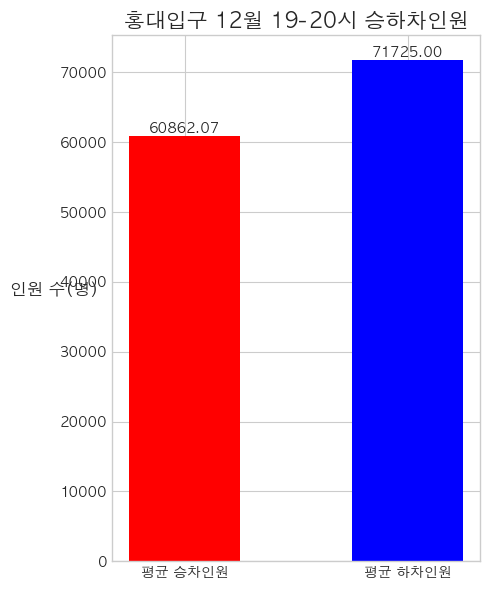

In [16]:
input_data = {
    '사용월': 12,
    '지하철역': '홍대입구',
    '예상도착시간': 19
}

# get 
avg = get_aggregation_getonoff(original_df, input_data)
print(avg)

# plot
plot_aggregation_getonoff(avg, input_data)

## model inference

In [17]:
pred = predict_passenger_lstm(model, station_encoder, month_encoder, input_data)
print(pred)  # {'승차인원': 100, '하차인원': 50}

1/1 [==============================] - 0s 9ms/step
{'승차인원': 20029, '하차인원': 27197}


/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_64893/2018863968.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_input = np.array([[input_data['사용월'], input_data['지하철역'], input_data['예상도착시간']]])
/Users/ihyeongseob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 판단

In [18]:
input_data = {
    '사용월': 12,
    '지하철역': '홍대입구',
    '예상도착시간': 12
}

month = input_data['사용월']
station = input_data['지하철역']
eta = input_data['예상도착시간']

# avg
avg = get_aggregation_getonoff(original_df, input_data)
total_avg = avg['평균 승차인원'] + avg['평균 하차인원']
print(f"{month}월 {eta}시 {station}역은 평균 {total_avg}명이 승하차합니다.")

# prediction
pred = predict_passenger_lstm(model, station_encoder, month_encoder, input_data)
total_pred = pred['승차인원'] + pred['하차인원']
print(f"{month}월 {eta}시 {station}역은 예상 {total_pred}명이 승하차할 것으로 예상됩니다.")


# Finial Result
print(f"\n추론 결과 -----------------------------------------------")

if total_pred <= total_avg:
    print(f"{month}월 {eta}시 {station}역은 평소와 같이 혼잡하지 않을 것으로 예상됩니다.")
elif total_pred >= total_avg * 1.5:
    print(f"{month}월 {eta}시 {station}역은 매우 혼잡할 것으로 예상됩니다.")
elif total_pred >= total_avg * 1.3:
    print(f"{month}월 {eta}시 {station}역은 혼잡할 것으로 예상됩니다.")

12월 12시 홍대입구역은 평균 81569.58620689655명이 승하차합니다.
1/1 [==============================] - 0s 10ms/step
12월 12시 홍대입구역은 예상 38476명이 승하차할 것으로 예상됩니다.

추론 결과 -----------------------------------------------
12월 12시 홍대입구역은 평소와 같이 혼잡하지 않을 것으로 예상됩니다.


/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_64893/2018863968.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_input = np.array([[input_data['사용월'], input_data['지하철역'], input_data['예상도착시간']]])
/Users/ihyeongseob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 추론 결과 & 시각화

In [26]:
def plot_avg_pred(avg, pred, month, station, eta) :
    rc('font', family='AppleGothic') 			
    plt.rcParams['axes.unicode_minus'] = False 
        
    # plot using seaborn
     # Prepare data for plotting
    categories = ['평균 승차인원', '평균 하차인원', '예상 승차인원', '예상 하차인원']
    values = [avg['평균 승차인원'], avg['평균 하차인원'], pred['승차인원'], pred['하차인원']]

    # Set up the figure and axes
    plt.figure(figsize=(5, 6))
    plt.bar(categories, values, color=['red', 'blue', 'pink', 'skyblue'], width=0.5)
    eta = preprocess_eta(eta)
    plt.title(f'{station}역 {month}월 {eta} 승하차인원', fontsize=15)
    plt.ylabel('인원 수(명)', fontsize=12, rotation=0)
    for i, v in enumerate(values):
        plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
        

    # Save the plot
    plt.tight_layout()
    plt.savefig(f'{station}_{month}월_{eta}_승하차인원.png')

    # Show plot
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

1/1 [==============================] - 0s 13ms/step

추론 결과 -----------------------------------------------
12월 19시 홍대입구역은 평소와 같이 혼잡하지 않을 것으로 예상됩니다.


/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_64893/2018863968.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_input = np.array([[input_data['사용월'], input_data['지하철역'], input_data['예상도착시간']]])
/Users/ihyeongseob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


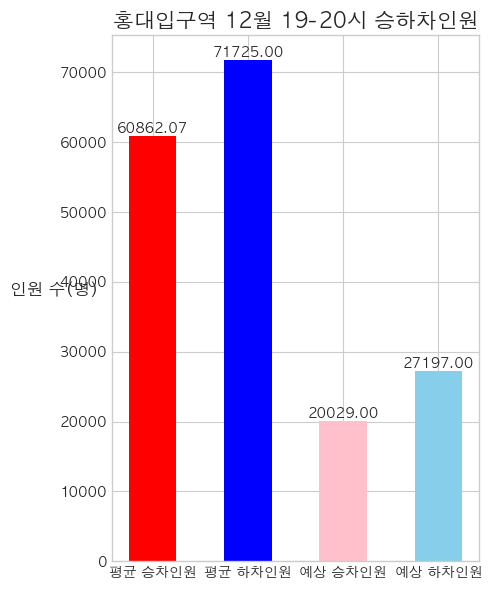

In [37]:
input_data = {
    '사용월': 12,
    '지하철역': '홍대입구',
    '예상도착시간': 19
}

# avg
avg = get_aggregation_getonoff(original_df, input_data)
total_avg = avg['평균 승차인원'] + avg['평균 하차인원']
# print(f"{month}월 {eta}시 {station}역은 평균 {total_avg}명이 승하차합니다.")

# prediction
month = input_data['사용월']
station = input_data['지하철역']
eta = input_data['예상도착시간']
pred = predict_passenger_lstm(model, station_encoder, month_encoder, input_data)
total_pred = pred['승차인원'] + pred['하차인원']
# print(f"{month}월 {eta}시 {station}역은 예상 {total_pred}명이 승하차할 것으로 예상됩니다.")


# Finial Result
print(f"\n추론 결과 -----------------------------------------------")

if total_pred <= total_avg:
    print(f"{month}월 {eta}시 {station}역은 평소와 같이 혼잡하지 않을 것으로 예상됩니다.")
elif total_pred >= total_avg * 1.5:
    print(f"{month}월 {eta}시 {station}역은 매우 혼잡할 것으로 예상됩니다.")
elif total_pred >= total_avg * 1.3:
    print(f"{month}월 {eta}시 {station}역은 혼잡할 것으로 예상됩니다.")
    
# visualization
plot_avg_pred(avg, pred, month, station, eta)

# 향후 필요한 개발사항

* '원할', '평균', '혼잡'의 기준을 명확히 정해야 함
* 더욱 정교한 모델을 위해 다양한 feature를 추가해야 함 (예를 들어, 요일, 날씨, 행사 등)
* 지하철 뿐만 아니라 버스에 대한 유동량 예측도 가능해야 함